# Bank Customer Churn Prediction

### Description 

In this project, I use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention.

### Contents

Part 1: Data Exploration <br>
Part 2: Feature Preprocessing <br>
Part 3: Model Training and Result Evaluation

In [1]:
# libraries
#basic libraries
import pandas as pd
import numpy as np
from pprint import pprint

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

# ploting
import matplotlib.pyplot as plt




### Part 1: Data Exploration 

#### 1.1 Get bacis info about the dataset

In [2]:
df = pd.read_csv('/Users/richardwang/Desktop/Projects/Bank Customer Churn Prediction/Data/bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#check the unique values for each columns
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### 1.2 Explore the features

In [5]:
# check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values, so we dont have to worry about it in our modeling part.

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

What we should focus on at first are: 'CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary'.

In [7]:
#Explore the numerical variables
#discrete: 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
#continuous: 'Balance', 'EstimatedSalary'
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

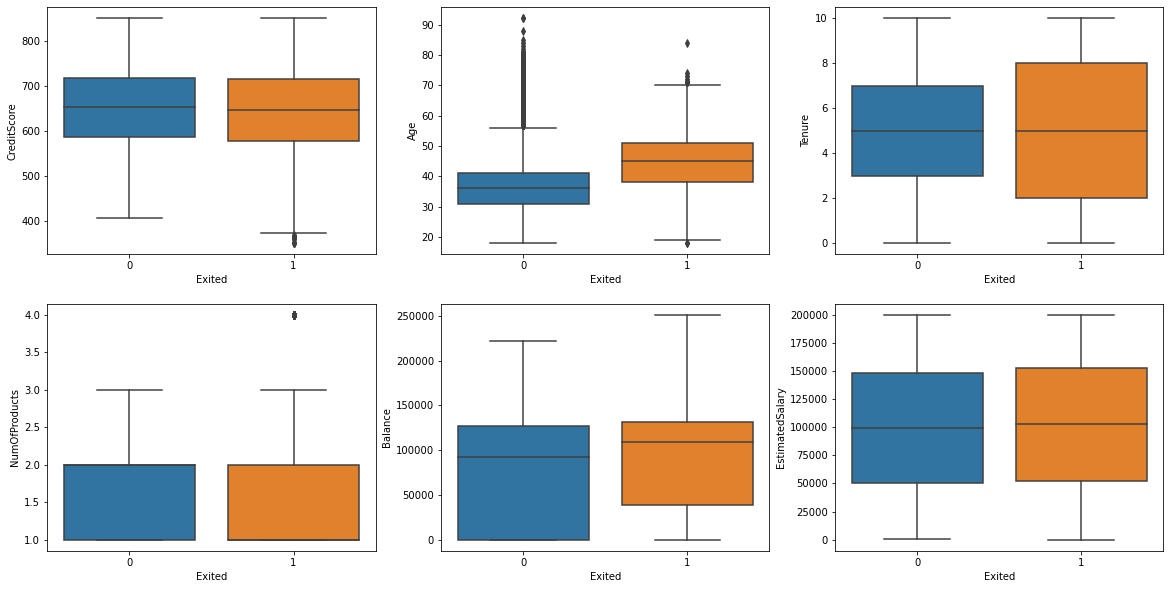

In [8]:
#boxplot for numerical features
fig,axss = plt.subplots(2,3, figsize = [20,10])
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = axss[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = axss[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = df, ax = axss[0][2])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = df, ax = axss[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = axss[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = axss[1][2])

<AxesSubplot:xlabel='Exited', ylabel='count'>

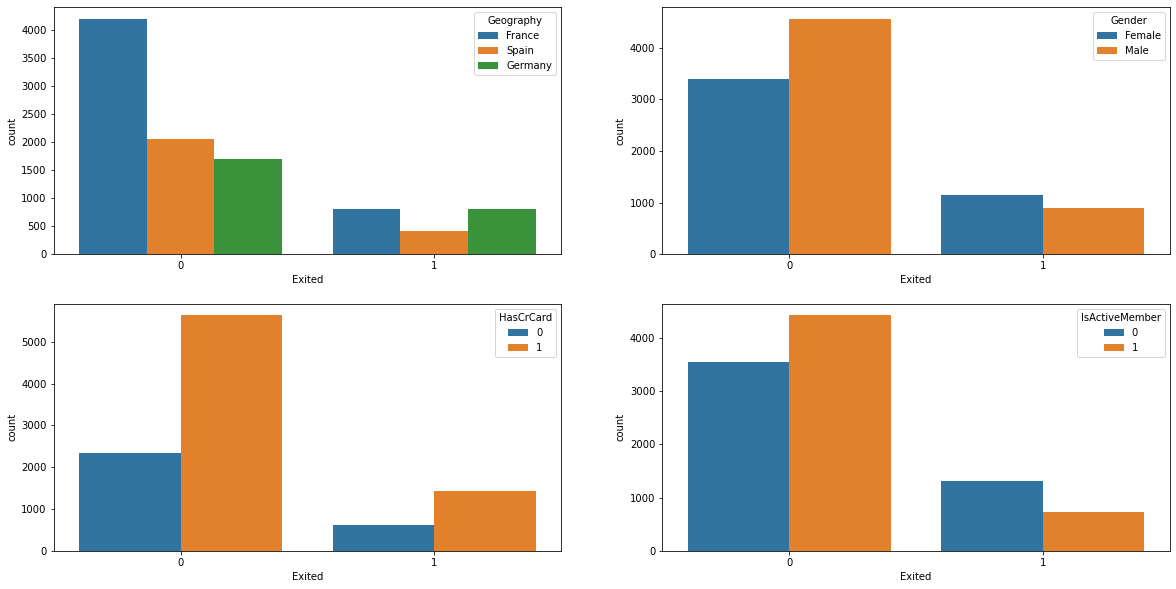

In [9]:
#Explore categorical features
#'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'
fig,axss = plt.subplots(2, 2, figsize = [20, 10])
sns.countplot(x = 'Exited', hue = 'Geography', data = df, ax = axss[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = df, ax = axss[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = df, ax = axss[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df, ax = axss[1][1])

### Part 2: Feature Preprocessing

In [10]:
#Target Variable
y = df['Exited']

In [11]:
# Drop useless features
cols_drop = ['RowNumber','CustomerId','Surname']
X = df.drop(cols_drop + ['Exited'], axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [13]:
#spilt independent variables' columns into cat and num columns
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [14]:
cat_cols, num_cols

(Index(['Geography', 'Gender'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'))

#### 2.1 split the dataset

In [15]:
#split the dataset into training and testing
#I used stratified spliting is because there could be extreme cases happen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    stratify = y, random_state = 677) # stratify

In [16]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6616,606,Spain,Male,33,8,0.00,2,1,1,63176.77
5921,508,Spain,Male,54,10,0.00,1,1,1,175749.36
7726,735,France,Male,55,6,134140.68,1,1,0,2267.88
3011,526,Spain,Male,30,8,0.00,1,1,0,36251.00
1828,547,Spain,Female,31,9,0.00,2,0,0,99294.22


#### 2.2 encode the categorical variables

In [17]:
# I used one hot encoding for the Geography variable
#define function for ohe part
def OneHotEncoding(df, encoder, categories):
    transformed = pd.DataFrame(enc.fit_transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc = OneHotEncoder()

X_train = OneHotEncoding(X_train, enc, categories)
X_test = OneHotEncoding(X_test, enc, categories)

In [18]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,606,Male,33,8,0.00,2,1,1,63176.77,0.0,0.0,1.0
1,508,Male,54,10,0.00,1,1,1,175749.36,0.0,0.0,1.0
2,735,Male,55,6,134140.68,1,1,0,2267.88,1.0,0.0,0.0
3,526,Male,30,8,0.00,1,1,0,36251.00,0.0,0.0,1.0
4,547,Female,31,9,0.00,2,0,0,99294.22,0.0,0.0,1.0


In [19]:
#ordinal encoding for the binary feature: gender
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc = OrdinalEncoder()

X_train[categories] = enc.fit_transform(X_train[categories])
X_test[categories] = enc.fit_transform(X_test[categories])

In [20]:
X_train.head()
#male = 1, female = 0

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,606,1.0,33,8,0.00,2,1,1,63176.77,0.0,0.0,1.0
1,508,1.0,54,10,0.00,1,1,1,175749.36,0.0,0.0,1.0
2,735,1.0,55,6,134140.68,1,1,0,2267.88,1.0,0.0,0.0
3,526,1.0,30,8,0.00,1,1,0,36251.00,0.0,0.0,1.0
4,547,0.0,31,9,0.00,2,0,0,99294.22,0.0,0.0,1.0


#### 2.3 Data Scaling

In [21]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [22]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.455970,1.0,-0.573152,1.046956,-1.215199,0.807885,0.647388,0.968496,-0.639648,0.0,0.0,1.0
1,-1.468993,1.0,1.426348,1.742485,-1.215199,-0.912483,0.647388,0.968496,1.310733,0.0,0.0,1.0
2,0.877500,1.0,1.521563,0.351428,0.929937,-0.912483,0.647388,-1.032529,-1.694927,1.0,0.0,0.0
3,-1.282928,1.0,-0.858795,1.046956,-1.215199,-0.912483,0.647388,-1.032529,-1.106151,0.0,0.0,1.0
4,-1.065851,0.0,-0.763581,1.394721,-1.215199,0.807885,-1.544670,-1.032529,-0.013893,0.0,0.0,1.0


### Part 3: Model Training and Result Evaluation

#### Part 3.1: Model Training

In [23]:
#Logistic Regression
clf_lr = LogisticRegression()

#K Nearest Neighbors
clf_knn = KNeighborsClassifier()

#Random Forest
clf_rf = RandomForestClassifier()

#### Part 3.2 Find the optimal Hyperparameters using Grid Search

Define helper function

In [24]:
# def a helper function to print out grid search results
def print_gs_metrics(gs):
    print('Best score: ' + str(gs.best_score_))
    print('Best parameters set: ')
    best_params = gs.best_params_
    for param_name in sorted(best_params.keys()):
        print(param_name + ':' + str(best_params[param_name]))

#### Part 3.2.1: Find for Logistics Regression

In [25]:
# Using 'liblinear' as solver is because it could use both L1 and L2 as regularization techniques

parameters = {
    'penalty':('l1','l2'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}

Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid = parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [26]:
#get the result info of our model
print_gs_metrics(Grid_LR)

Best score: 0.8092
Best parameters set: 
C:0.2
penalty:l1


In [27]:
#build the best model for LR
best_model_lr = Grid_LR.best_estimator_

In [28]:
best_model_lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
best_model_lr.score(X_test, y_test)

0.818

In [30]:
#shows the grid search result
model_result_lr = pd.DataFrame(Grid_LR.cv_results_)
model_result_lr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007246,0.001045,0.001141,0.000095,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.802667,0.808000,0.796667,0.801333,0.797333,0.801200,0.004097,10
1,0.005346,0.000441,0.000768,0.000099,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.811333,0.813333,0.806000,0.809333,0.804667,0.808933,0.003228,3
2,0.008140,0.001541,0.000732,0.000042,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.808000,0.812000,0.806000,0.808667,0.806667,0.808267,0.002091,5
3,0.005278,0.000007,0.000667,0.000019,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.810667,0.813333,0.802000,0.809333,0.806000,0.808267,0.003924,4
4,0.008911,0.002210,0.000654,0.000011,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.810667,0.812000,0.805333,0.811333,0.806667,0.809200,0.002680,2


In [31]:
#use pivot function to reshape the res df for ploting
res = model_result_lr.pivot(index = 'param_penalty', 
                            columns = 'param_C', values = 'mean_test_score')
res

param_C,0.01,0.05,0.10,0.20,1.00
param_penalty,,,,,
l1,0.801200,0.808267,0.809200,0.809200,0.808267
l2,0.808933,0.808267,0.808267,0.808133,0.808267


<AxesSubplot:xlabel='param_C', ylabel='param_penalty'>

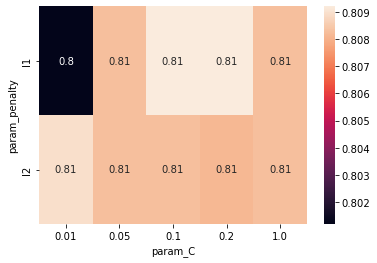

In [32]:
#plot the result by regularization type and penalty strength
sns.heatmap(res, annot = True)

#### Part 3.2.2: Find for KNN

In [33]:
#the only hyperparamter we should tune is K
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(clf_knn, param_grid = parameters, cv = 5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [34]:
#print the best k
print_gs_metrics(Grid_KNN)

Best score: 0.8402666666666667
Best parameters set: 
n_neighbors:9


In [35]:
#test model accuracy
best_model_knn = Grid_KNN.best_estimator_
best_model_knn.score(X_test, y_test)

0.8508

#### Part 3.2.3: Find for Random Forest

In [36]:
#print out the existing(default) hyperparams
print('Parameters currently in use:\n')
pprint(clf_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


##### To find the optimal hyperparams in the rf model:
##### Step 1: narrow the hyperparams range using random grid search 
##### Step 2: using grid search to improve the random search result

#### Step 1: random grid search

In [37]:
#create random grid dict

# spliting criteria
criterion = ['gini', 'entropy']

# # of trees in rf
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 8)]

# Max # of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Min # of samples required to split a node
min_samples_split = [2, 5, 10]

# Min # of samples required at each leaf node (for the effect of smoothing the model)
# This one is optional, because it will affect the regression model more, but our is classifier
min_samples_leaf = [1, 2 ,4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# create the random grid
random_grid = {
    'criterion': criterion,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500]}


In [38]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose = 1, random_state = 677, n_jobs = -1)

rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300,
                                                         1500]},
                   random_state=677, verbose=1)

In [39]:
#get the result of random grid search for rf
print_gs_metrics(rf_random)

Best score: 0.8616
Best parameters set: 
bootstrap:False
criterion:gini
max_depth:10
min_samples_leaf:2
min_samples_split:2
n_estimators:300


In [40]:
random_grid_accuracy = rf_random.score(X_test, y_test)
random_grid_accuracy

0.8736

#### Step 2: grid search

param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300,
                                                         1500]},

In [41]:
param_grid = {
    'n_estimators': [1000, 1050, 1100, 1150, 1200],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [2, 3],
    'max_depth': [85, 90, 95],
    'criterion': ['gini'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [85, 90, 95], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [1000, 1050, 1100, 1150, 1200]},
             verbose=1)

In [42]:
# print the result 
print_gs_metrics(grid_search)

Best score: 0.8621333333333334
Best parameters set: 
bootstrap:True
criterion:gini
max_depth:90
min_samples_leaf:3
min_samples_split:10
n_estimators:1000


In [43]:
grid_search_accuracy = grid_search.score(X_test, y_test)
grid_search_accuracy

0.8708

In [44]:
#compare the result of random search and grid search
print('Improvement of {:0.2f}%.'.format( 100 * (grid_search_accuracy - random_grid_accuracy) / random_grid_accuracy))

Improvement of -0.32%.


In [45]:
best_model_rf = grid_search.best_estimator_
best_model_rf

RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1000)

#### Part 3.3 Model Evalution - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp); Total number of true predictive churn divided by the total number of predictive churn; High Precision means low fp, not many return users were predicted as churn users.

Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn) Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [46]:
# calculate accuracy, precision and recall
def print_model_evla(classifier, name):
    precision = precision_score(y_test, classifier.predict(X_test))
    recall = recall_score(y_test, classifier.predict(X_test))
    accuracy = accuracy_score(y_test, classifier.predict(X_test))
    print(name + ':')
    print("Accuracy is: " + str(accuracy))
    print("precision is: " + str(precision))
    print("recall is: " + str(recall))
    print()

# print the result for models
print_model_evla(best_model_knn, 'K nearest neighbor')
print_model_evla(best_model_lr, 'Logistic Regression')
print_model_evla(best_model_rf, 'Random Forest')

K nearest neighbor:
Accuracy is: 0.8508
precision is: 0.7297297297297297
recall is: 0.4243614931237721

Logistic Regression:
Accuracy is: 0.818
precision is: 0.6534090909090909
recall is: 0.22593320235756384

Random Forest:
Accuracy is: 0.8708
precision is: 0.803921568627451
recall is: 0.48330058939096265



#### Part 3.4: Model Evaluation - ROC & AUC

#### Part 3.4.1: ROC of Knn Model

In [47]:
# Use predict_proba to get the probability results of knn
y_pred_knn = best_model_knn.predict_proba(X_test)[:, 1]# use the second column here is because the positive class is 1
fpr_knn, tpr_knn, threshholds_knn = roc_curve(y_test, y_pred_knn)

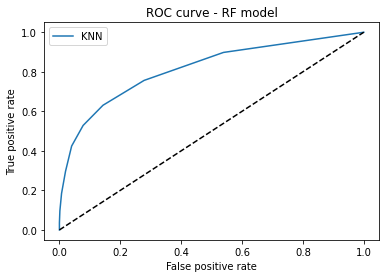

In [48]:
# ROC curve of KNN result
#data input
plt.plot(fpr_knn, tpr_knn, label = 'KNN')

#basic setting
plt.figure(1)
#put a dashed line
plt.plot([0, 1], [0, 1], 'k--')#k-- means black dashed line

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')

plt.show()

In [49]:
# AUC score
auc(fpr_knn,tpr_knn)

0.8138780701763042

#### Part 3.4.2: ROC of LR Model

In [50]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_model_lr.predict_proba(X_test)[:, 1]# use the second column here is because the positive class is 1
fpr_lr, tpr_lr, threshholds_lr = roc_curve(y_test, y_pred_lr)

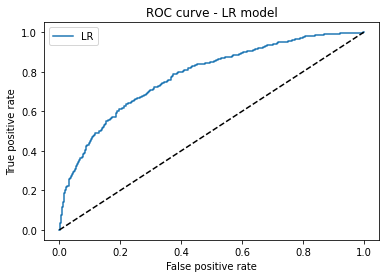

In [51]:
# ROC curve of LR result
#data input
plt.plot(fpr_lr, tpr_lr, label = 'LR')

#basic setting
plt.figure(1)
#put a dashed line
plt.plot([0, 1], [0, 1], 'k--')#k-- means black dashed line

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR model')
plt.legend(loc='best')

plt.show()

In [52]:
# AUC score
auc(fpr_lr,tpr_lr)

0.778124349355992

#### Part 3.4.3: ROC of RF Model

In [53]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_model_rf.predict_proba(X_test)[:, 1]# use the second column here is because the positive class is 1
fpr_rf, tpr_rf, threshholds_rf = roc_curve(y_test, y_pred_rf)

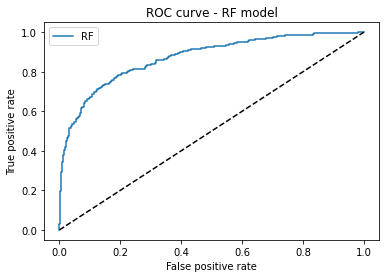

In [54]:
# ROC curve of RF result
#data input
plt.plot(fpr_rf, tpr_rf, label = 'RF')

#basic setting
plt.figure(1)
#put a dashed line
plt.plot([0, 1], [0, 1], 'k--')#k-- means black dashed line

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')

plt.show()

# AUC score
auc(fpr_rf,tpr_rf)

#### Part 4: Model Extra Functionality (feature importance)

#### Part 4.1: Random Forest Model

In [58]:
# check feature importance of random forest for feature selection

importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
  print ("{0} : {1}".format(X_train.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2874
NumOfProducts : 0.1858
Balance : 0.1238
CreditScore : 0.1029
EstimatedSalary : 0.1011
IsActiveMember : 0.0591
Tenure : 0.0588
Geography_Germany : 0.0309
Gender : 0.017
HasCrCard : 0.013
Geography_France : 0.011
Geography_Spain : 0.0091


#### Part 4.2: Logistic Regression Model

In [59]:
# check the coef for feature selection

indices = np.argsort(abs(best_model_lr.coef_[0]))[::-1]

print ("Logistic Regression Coefficients")
for ind in range(X_train.shape[1]):
  print ("{0} : {1}".format(X_train.columns[indices[ind]],round(best_model_lr.coef_[0][indices[ind]], 4)))

Logistic Regression Coefficients
Geography_France : -0.7765
Age : 0.7304
Geography_Spain : -0.7217
IsActiveMember : -0.5361
Gender : -0.4246
Balance : 0.1607
NumOfProducts : -0.0665
CreditScore : -0.0602
Tenure : -0.045
HasCrCard : -0.0218
EstimatedSalary : 0.0199
Geography_Germany : 0.0
